In [41]:
import numpy as np
import pandas as pd

In [57]:
df = pd.read_excel('titanic.xls')

In [58]:
# Split the data
train_set = df.head(1100)
test_set = df.tail(len(df) - 1100)

In [59]:
train_set

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,3,0,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,NaN,NaN,NaN
1096,3,0,"Palsson, Master. Gosta Leonard",male,2.0000,3,1,349909,21.0750,NaN,S,NaN,4.0,NaN
1097,3,0,"Palsson, Master. Paul Folke",male,6.0000,3,1,349909,21.0750,NaN,S,NaN,NaN,NaN
1098,3,0,"Palsson, Miss. Stina Viola",female,3.0000,3,1,349909,21.0750,NaN,S,NaN,NaN,NaN


In [60]:
test_set

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1100,3,0,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,NaN,206.0,NaN
1101,3,0,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S,NaN,NaN,NaN
1102,3,0,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,NaN,NaN,NaN
1103,3,0,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S,NaN,NaN,NaN
1104,3,0,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [70]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [71]:
# Define features and target
X_train = train_set[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y_train = train_set['survived']
X_test = test_set[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y_test = test_set['survived']

In [83]:
accuracies = {}

# One-hot encode categorical variables
encoder = OneHotEncoder()
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[['sex']]).toarray(), columns=['female', 'male'])    #Toarray 转换成Numpy数组
X_test_encoded = pd.DataFrame(encoder.transform(X_test[['sex']]).toarray(), columns=['female', 'male'])

X_train_encoded = pd.concat([X_train.drop(columns=['sex']), X_train_encoded], axis=1)
X_test_encoded = pd.concat([X_test.drop(columns=['sex']), X_test_encoded], axis=1)

# Loop 
for depth in range(1, 9):
    # Info gain as the criterion
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    
    clf.fit(X_train_encoded, y_train)
    y_pred = clf.predict(X_test_encoded)
    y_pred = y_pred[:len(y_test)]  #
    
    # Calculate 
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[depth] = accuracy

In [84]:
# Print results
for depth, accuracy in accuracies.items():
    print(f"Depth {depth}: Accuracy {accuracy}")

Depth 1: Accuracy 0.8277511961722488
Depth 2: Accuracy 0.8277511961722488
Depth 3: Accuracy 0.8277511961722488
Depth 4: Accuracy 0.7655502392344498
Depth 5: Accuracy 0.7655502392344498
Depth 6: Accuracy 0.8277511961722488
Depth 7: Accuracy 0.7655502392344498
Depth 8: Accuracy 0.7607655502392344


2

In [74]:
import matplotlib.pyplot as plt

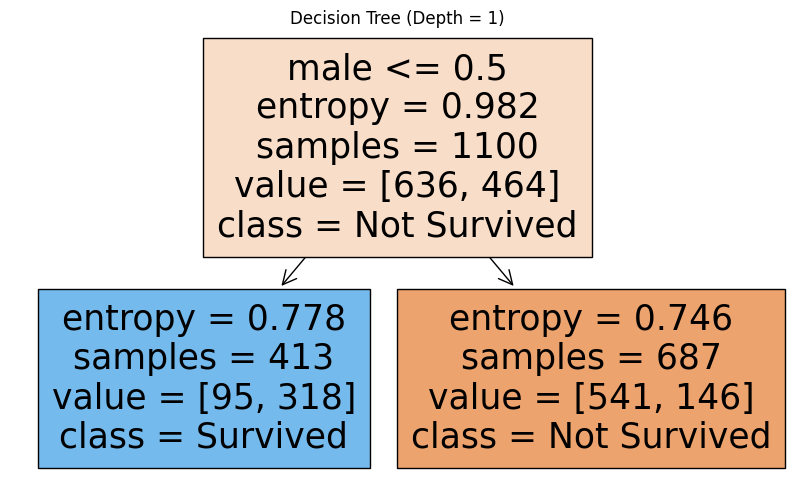

In [79]:
# Set the DT
clf_d1 = DecisionTreeClassifier(max_depth=1, criterion='entropy')
clf_d1.fit(X_train_encoded, y_train)

clf_d2 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf_d2.fit(X_train_encoded, y_train)

# Plot for 𝑑 = 1
plt.figure(figsize=(10, 6))
plot_tree(clf_d1, feature_names=X_train_encoded.columns.tolist(), class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree (Depth = 1)')
plt.show()

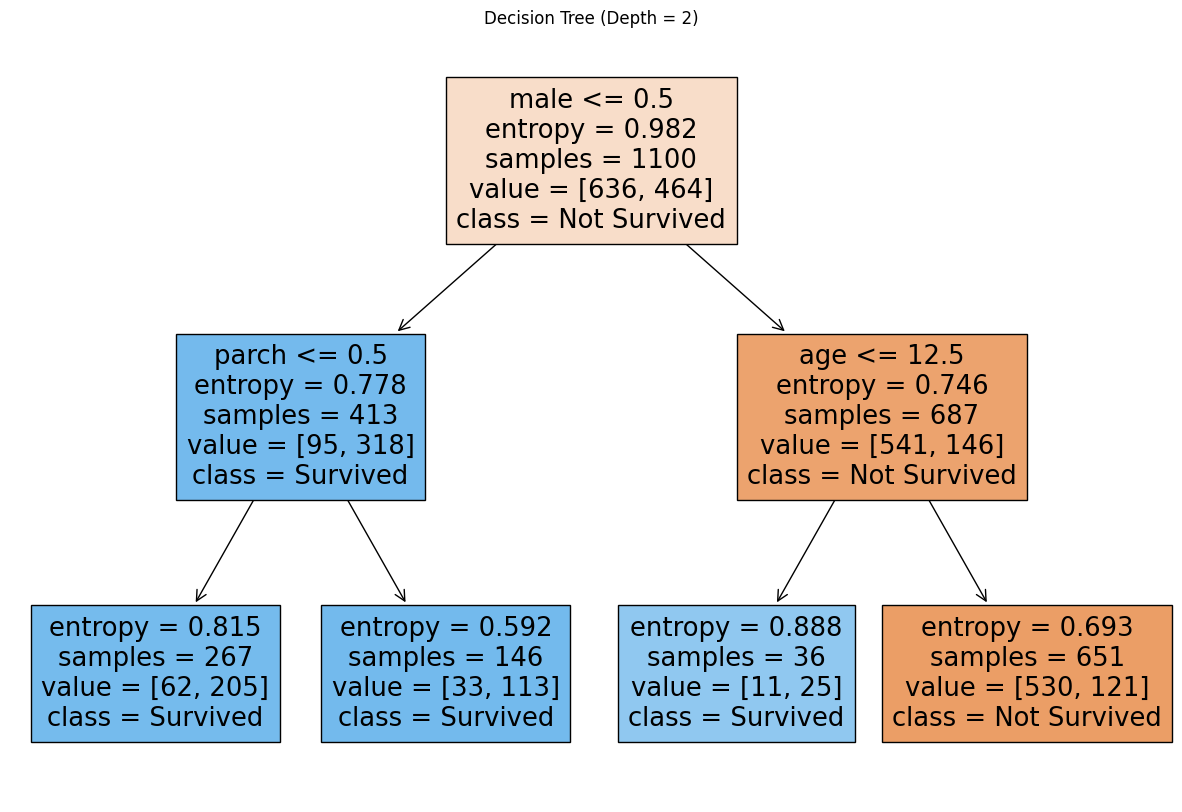

In [78]:
# Plot for 𝑑 = 2
plt.figure(figsize=(15, 10))
plot_tree(clf_d2, feature_names=X_train_encoded.columns.tolist(), class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree (Depth = 2)')
plt.show()

### The judgement features of the decision tree are mainly gender and age, female, age less than 12. 5 years will survive (according to the results of the decision tree)

3

In [86]:
test_errors = {}

for depth, accuracy in accuracies.items():
    # 1 - accuracy
    test_error = 1 - accuracy
    test_errors[depth] = test_error

print("Test errors for each depth:")
for depth, error in test_errors.items():
    print(f"Depth {depth}: Test Error = {error}")

Test errors for each depth:
Depth 1: Test Error = 0.1722488038277512
Depth 2: Test Error = 0.1722488038277512
Depth 3: Test Error = 0.1722488038277512
Depth 4: Test Error = 0.23444976076555024
Depth 5: Test Error = 0.23444976076555024
Depth 6: Test Error = 0.1722488038277512
Depth 7: Test Error = 0.23444976076555024
Depth 8: Test Error = 0.23923444976076558


### Test error didn't change much, instead, it even improves with depth from 0.17 to 0.23.